# Speech recognition demo
https://espnet.github.io/espnet/notebook/espnet2_tutorial_2021_CMU_11751_18781.html


In [1]:
#@title Choose English ASR model { run: "auto" }

lang = 'en'
fs = 16000 #@param {type:"integer"}
tag = 'Shinji Watanabe/spgispeech_asr_train_asr_conformer6_n_fft512_hop_length256_raw_en_unnorm_bpe5000_valid.acc.ave' #@param ["Shinji Watanabe/spgispeech_asr_train_asr_conformer6_n_fft512_hop_length256_raw_en_unnorm_bpe5000_valid.acc.ave", "kamo-naoyuki/librispeech_asr_train_asr_conformer6_n_fft512_hop_length256_raw_en_bpe5000_scheduler_confwarmup_steps40000_optim_conflr0.0025_sp_valid.acc.ave"] {type:"string"}

In [8]:
# #@title Choose Japanese ASR model { run: "auto" }

# lang = 'ja'
# fs = 16000 #@param {type:"integer"}
# tag = 'Shinji Watanabe/laborotv_asr_train_asr_conformer2_latest33_raw_char_sp_valid.acc.ave' #@param ["Shinji Watanabe/laborotv_asr_train_asr_conformer2_latest33_raw_char_sp_valid.acc.ave"] {type:"string"}

In [ ]:
# difflib can be used to evaluated the similarity between two strings

In [2]:
import time
import torch
import string
from espnet_model_zoo.downloader import ModelDownloader
from espnet2.bin.asr_inference import Speech2Text


d = ModelDownloader()
# It may takes a while to download and build models
speech2text = Speech2Text(
    **d.download_and_unpack(tag),
    device="cuda",
    minlenratio=0.0,
    maxlenratio=0.0,
    ctc_weight=0.3,
    beam_size=10,
    batch_size=0,
    nbest=1
)

def text_normalizer(text):
    text = text.upper()
    return text.translate(str.maketrans('', '', string.punctuation))

/net/papilio/storage6/phusaeng/anaconda3/envs/pytorch2/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/net/papilio/storage6/phusaeng/anaconda3/envs/pytorch2/lib/python3.10/site-packages/whisper/timing.py:58: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def backtrace(trace: np.ndarray):


Input Speech: ESPNet_asr_egs/ja/9.wav


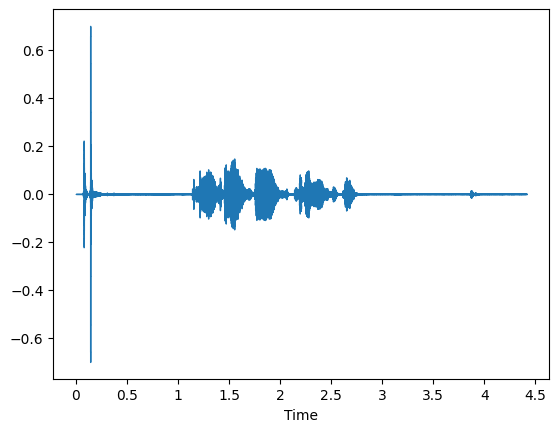

Reference text: 彼女は頬をふくらませた。
ESPnet: そして彼女は法を膨らませた
ESPnet's wer: 100.0
Whisper: 楽しみに、お楽しみに、お楽しみに、お楽しみに、お楽しみに、お楽しみに、お楽しみに、お楽しみに、お楽しみに、お楽しみに、お楽しみに、お楽しみに、お楽しみに、お楽しみに、お楽しみに、お楽しみに、お楽しみに、お楽しみに、お楽しみに、お楽しみに、お楽しみに、お楽しみに、お楽しみに、お楽しみに、お楽しみに、お楽しみに、お楽しみに、お楽しみに、お楽しみに、お楽しみに、お楽しみに、お楽しみに、お楽しみに、お楽しみに、お楽しみに、お楽しみに、お楽しみに、お楽
Detected language: ja
whisper's wer: 100.0
**************************************************


/net/papilio/storage6/phusaeng/anaconda3/envs/pytorch2/lib/python3.10/site-packages/espnet/nets/ctc_prefix_score.py:323: RuntimeWarning: invalid value encountered in logaddexp
  r_sum = self.xp.logaddexp(


Input Speech: ESPNet_asr_egs/ja/10.wav


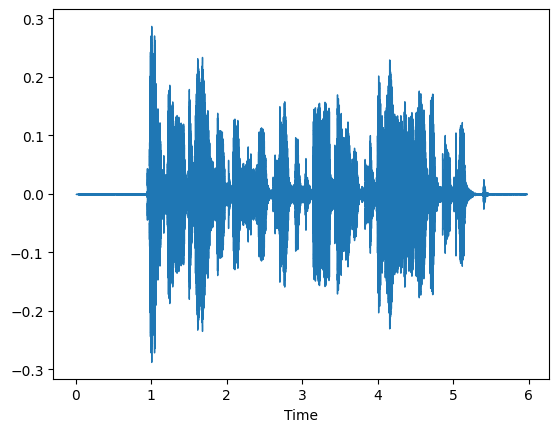

Reference text: 両手の指は変形し、関節の辺りが、こぶ状に盛り上がっていた。
ESPnet: 描写の指は変形し関節の辺りが極上に盛り上がっていた
ESPnet's wer: 100.0
Whisper: 両手の指は変形し、 感測のあたりが古不正に盛り上がっていた。
Detected language: ja
whisper's wer: 200.0
**************************************************
Input Speech: ESPNet_asr_egs/ja/11.wav


/net/papilio/storage6/phusaeng/anaconda3/envs/pytorch2/lib/python3.10/site-packages/espnet/nets/ctc_prefix_score.py:323: RuntimeWarning: invalid value encountered in logaddexp
  r_sum = self.xp.logaddexp(


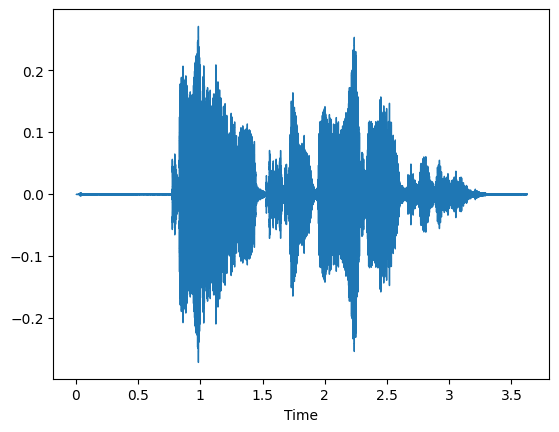

Reference text: 去年より今年のほうが暑いです。
ESPnet: 去年より今年のほうが暑いです
ESPnet's wer: 100.0
Whisper: 今日のより今年の方があっていいです
Detected language: ja
whisper's wer: 100.0
**************************************************


In [56]:
# ! git clone https://github.com/ftshijt/ESPNet_asr_egs.git

import pandas as pd
import soundfile
import librosa.display
from IPython.display import display, Audio
from evaluate import load
import matplotlib.pyplot as plt
import whisper


model = whisper.load_model("base")

wer = load('wer')


egs = pd.read_csv("ESPNet_asr_egs/egs.csv")
for index, row in egs.iterrows():
  if row["lang"] == lang or lang == "multilingual":
    wav_path = "ESPNet_asr_egs/" + row["path"]
    speech, rate = soundfile.read(wav_path)
    assert fs == int(row["sr"])
    nbests = speech2text(speech)

    text, *_ = nbests[0]
    print(f"Input Speech: ESPNet_asr_egs/{row['path']}")
    # let us listen to samples
    display(Audio(speech, rate=rate))
    # librosa.display.waveplot(speech, sr=rate)
    librosa.display.waveshow(speech, sr=rate)
    plt.show()
    gt = text_normalizer(row['text'])
    print(f"Reference text: {gt}")
    # print(f"ASR hypothesis: {text_normalizer(text)}")
    espnet_text = text_normalizer(text)
    print(f"ESPnet: {espnet_text}")
    print(f"ESPnet's wer: {100 * wer.compute(references=[gt], predictions=[espnet_text])}")
    # load audio and pad/trim it to fit 30 seconds
    audio = whisper.load_audio(wav_path)
    audio = whisper.pad_or_trim(audio)

    # make log-Mel spectrogram and move to the same device as the model
    mel = whisper.log_mel_spectrogram(audio).to(model.device)

    # detect the spoken language
    _, probs = model.detect_language(mel)
    
    # decode the audio
    options = whisper.DecodingOptions()
    result = whisper.decode(model, mel, options)
    whisper_text = result.text
    # type of the text
    # print the recognized text
    print(f"Whisper: {result.text}")
    print(f"Detected language: {max(probs, key=probs.get)}")
    print(f"whisper's wer: {100 * wer.compute(references=[gt], predictions=[whisper_text])}")


    print("*" * 50)


In [18]:
from evaluate import load

wer = load('wer')
wer.compute(references=["HELLO WORLD"], predictions=["HELLO WwwwwORLD"])

0.5

In [55]:

print(list(gt)) ,print(list(result.text)) #, list(whisper_text)
wer.compute(references=list(gt), predictions=list(whisper_text))

['彼', '女', 'は', '頬', 'を', 'ふ', 'く', 'ら', 'ま', 'せ', 'た', '。']
['両', '手', 'の', '指', 'は', '変', '形', 'し', '、', ' ', '感', '測', 'の', 'あ', 'た', 'り', 'が', '古', '不', '正', 'に', '盛', 'り', '上', 'が', 'っ', 'て', 'い', 'た', '。']


ValueError: Mismatch in the number of predictions (30) and references (12)

In [16]:
wer

EvaluationModule(name: "wer", module_type: "metric", features: {'predictions': Value(dtype='string', id='sequence'), 'references': Value(dtype='string', id='sequence')}, usage: """
Compute WER score of transcribed segments against references.

Args:
    references: List of references for each speech input.
    predictions: List of transcriptions to score.
    concatenate_texts (bool, default=False): Whether to concatenate all input texts or compute WER iteratively.

Returns:
    (float): the word error rate

Examples:

    >>> predictions = ["this is the prediction", "there is an other sample"]
    >>> references = ["this is the reference", "there is another one"]
    >>> wer = evaluate.load("wer")
    >>> wer_score = wer.compute(predictions=predictions, references=references)
    >>> print(wer_score)
    0.5
""", stored examples: 0)

In [25]:
txt = "Good night Sam!"
x = "mSa"
y = "eJo"
z = "odnght"
mytable = str.maketrans(x, y, z)
print(txt.translate(mytable))

G i Joe!


In [26]:
mytable

{109: 101,
 83: 74,
 97: 111,
 111: None,
 100: None,
 110: None,
 103: None,
 104: None,
 116: None}

In [27]:
egs

,id,lang,path,sr,text
0,1,en,en/1.wav,16000,IT WILL NOT BE SAFE FOR YOU TO STAY HERE NOW
1,2,en,en/2.wav,16000,IT WILL BE NO DISAPPOINTMENT TO ME
2,3,en,en/3.wav,16000,HOWEVER THAT WAS OVER NOW THE TREE GONE THE ST...
3,4,en,en/4.wav,16000,ALL IS SAID WITHOUT A WORD
4,5,en,en/5.wav,16000,IT IS THIS THAT IS OF INTEREST TO THEORY OF KN...
5,6,es,es/6.wav,16000,HABITA EN AGUAS POCO PROFUNDAS Y ROCOSAS.
6,7,es,es/7.wav,16000,LAS GUITARRAS SIGUEN EL MISMO CONCEPTO.
7,8,es,es/8.wav,16000,ESTA PALOMA ES CONOCIDA SOLAMENTE POR RESTOS F...
8,9,ja,ja/9.wav,16000,彼女は頬をふくらませた。
9,10,ja,ja/10.wav,16000,両手の指は変形し、関節の辺りが、こぶ状に盛り上がっていた。


In [56]:
row.index, row.values

(Index(['id', 'lang', 'path', 'sr', 'text'], dtype='object'),
 array([14, 'zh', 'zh/14.wav', 16000, '整个下午依然哭个不停'], dtype=object))

# Speech synthesis demo

In [4]:
#@title Choose English model { run: "auto" }
lang = 'English'
tag = 'kan-bayashi/ljspeech_vits' #@param ["kan-bayashi/ljspeech_tacotron2", "kan-bayashi/ljspeech_fastspeech", "kan-bayashi/ljspeech_fastspeech2", "kan-bayashi/ljspeech_conformer_fastspeech2", "kan-bayashi/ljspeech_vits"] {type:"string"}
vocoder_tag = "none" #@param ["none", "parallel_wavegan/ljspeech_parallel_wavegan.v1", "parallel_wavegan/ljspeech_full_band_melgan.v2", "parallel_wavegan/ljspeech_multi_band_melgan.v2", "parallel_wavegan/ljspeech_hifigan.v1", "parallel_wavegan/ljspeech_style_melgan.v1"] {type:"string"}

In [5]:
from espnet2.bin.tts_inference import Text2Speech
from espnet2.utils.types import str_or_none

text2speech = Text2Speech.from_pretrained(
    model_tag=str_or_none(tag),
    vocoder_tag=str_or_none(vocoder_tag),
    device="cuda",
    # Only for Tacotron 2 & Transformer
    threshold=0.5,
    # Only for Tacotron 2
    minlenratio=0.0,
    maxlenratio=10.0,
    use_att_constraint=False,
    backward_window=1,
    forward_window=3,
    # Only for FastSpeech & FastSpeech2 & VITS
    speed_control_alpha=1.0,
    # Only for VITS
    noise_scale=0.667,
    noise_scale_dur=0.8,
)

/net/papilio/storage6/phusaeng/anaconda3/envs/pytorch2/lib/python3.10/site-packages/espnet2/gan_tts/vits/monotonic_align/__init__.py:19: UserWarning: Cython version is not available. Fallback to 'EXPERIMETAL' numba version. If you want to use the cython version, please build it as follows: `cd espnet2/gan_tts/vits/monotonic_align; python setup.py build_ext --inplace`
  warnings.warn(


In [6]:
import time
import torch

# decide the input sentence by yourself
print(f"Input your favorite sentence in {lang}.")
x = input()

# synthesis
with torch.no_grad():
    start = time.time()
    wav = text2speech(x)["wav"]
rtf = (time.time() - start) / (len(wav) / text2speech.fs)
print(f"RTF = {rtf:5f}")

# let us listen to generated samples
from IPython.display import display, Audio
display(Audio(wav.view(-1).cpu().numpy(), rate=text2speech.fs))

Input your favorite sentence in English.
RTF = 0.260542


# Speech enhancement demo

In [7]:
# !gdown --id 1SmrN5NFSg6JuQSs2sfy3ehD8OIcqK6wS -O ./content/M05_440C0213_PED_REAL.wav
import os

import soundfile
from IPython.display import display, Audio
mixwav_mc, sr = soundfile.read("./content/M05_440C0213_PED_REAL.wav")
# mixwav.shape: num_samples, num_channels
mixwav_sc = mixwav_mc[:,4]
display(Audio(mixwav_mc.T, rate=sr))

In [70]:
# !gdown --id 17DMWdw84wF3fz3t7ia1zssdzhkpVQGZm -O ./content/chime_tasnet_singlechannel.zip
# !unzip ./content/chime_tasnet_singlechannel.zip -d ./content/enh_model_sc

Archive:  ./content/chime_tasnet_singlechannel.zip
 extracting: ./content/enh_model_sc/meta.yaml  
 extracting: ./content/enh_model_sc/exp/enh_train_enh_conv_tasnet_raw/config.yaml  
 extracting: ./content/enh_model_sc/exp/enh_train_enh_conv_tasnet_raw/5epoch.pth  
 extracting: ./content/enh_model_sc/exp/enh_stats_16k/train/feats_stats.npz  


In [8]:
# Load the model
# If you encounter error "No module named 'espnet2'", please re-run the 1st Cell. This might be a colab bug.
import sys
import soundfile
from espnet2.bin.enh_inference import SeparateSpeech


separate_speech = {}
# For models downloaded from GoogleDrive, you can use the following script:
enh_model_sc = SeparateSpeech(
  train_config="./content/enh_model_sc/exp/enh_train_enh_conv_tasnet_raw/config.yaml",
  model_file="./content/enh_model_sc/exp/enh_train_enh_conv_tasnet_raw/5epoch.pth",
  # for segment-wise process on long speech
  normalize_segment_scale=False,
  show_progressbar=True,
  ref_channel=4,
  normalize_output_wav=True,
  device="cuda:0",
)

In [9]:
# play the enhanced single-channel speech
wave = enh_model_sc(mixwav_sc[None, ...], sr)
print("Input real noisy speech", flush=True)
display(Audio(mixwav_sc, rate=sr))
print("Enhanced speech", flush=True)
display(Audio(wave[0].squeeze(), rate=sr))

Input real noisy speech


Enhanced speech


In [10]:
#@title Choose Speech Separation model { run: "auto" }

fs = 8000 #@param {type:"integer"}
tag = "Chenda Li/wsj0_2mix_enh_train_enh_conv_tasnet_raw_valid.si_snr.ave" #@param ["Chenda Li/wsj0_2mix_enh_train_enh_conv_tasnet_raw_valid.si_snr.ave", "Chenda Li/wsj0_2mix_enh_train_enh_rnn_tf_raw_valid.si_snr.ave", "https://zenodo.org/record/4688000/files/enh_train_enh_dprnn_tasnet_raw_valid.si_snr.ave.zip"]

In [11]:
# For models uploaded to Zenodo, you can use the following python script instead:
import sys
import soundfile
from espnet_model_zoo.downloader import ModelDownloader
from espnet2.bin.enh_inference import SeparateSpeech

d = ModelDownloader()

cfg = d.download_and_unpack(tag)
separate_speech = SeparateSpeech(
  train_config=cfg["train_config"],
  model_file=cfg["model_file"],
  # for segment-wise process on long speech
  segment_size=2.4,
  hop_size=0.8,
  normalize_segment_scale=False,
  show_progressbar=True,
  ref_channel=None,
  normalize_output_wav=True,
  device="cuda:0",
)

In [12]:
# !gdown --id 1ZCUkd_Lb7pO2rpPr4FqYdtJBZ7JMiInx -O ./content/447c020t_1.2106_422a0112_-1.2106.wav

import os
import soundfile
from IPython.display import display, Audio

mixwav, sr = soundfile.read("./content/447c020t_1.2106_422a0112_-1.2106.wav")
waves_wsj = separate_speech(mixwav[None, ...], fs=sr)

print("Input mixture", flush=True)
display(Audio(mixwav, rate=sr))
print(f"========= Separated speech with model {tag} =========", flush=True)
print("Separated spk1", flush=True)
display(Audio(waves_wsj[0].squeeze(), rate=sr))
print("Separated spk2", flush=True)
display(Audio(waves_wsj[1].squeeze(), rate=sr))

100%|██████████| 13/13 [00:00<00:00, 70.36it/s]

Input mixture


========= Separated speech with model Chenda Li/wsj0_2mix_enh_train_enh_conv_tasnet_raw_valid.si_snr.ave =========
Separated spk1


Separated spk2
